In [1]:
import nltk
import pandas as pd
import numpy
import csv
import string
from nltk.corpus import stopwords
import pickle
stop_words = set(stopwords.words("English"))

# Loading Data

In [2]:
data = pd.read_csv("London_hotel_reviews.csv", encoding='latin1')

In [3]:
data1 = data.copy()

#  Cleaning the data to make it more easy to process

# Convert text to lower case

In [4]:
data1["Property Name"] = data["Property Name"].apply(lambda x: x.lower() if type(x) == str else x)
data1["Review Title"] = data["Review Title"].apply(lambda x: x.lower() if type(x) == str else x)
data1["Review Text"] = data["Review Text"].apply(lambda x: x.lower() if type(x) == str else x)
data1["Location Of The Reviewer"] = data["Location Of The Reviewer"].apply(lambda x: x.lower() if type(x) == str else x)

# Tokenize Text

In [5]:
from nltk.tokenize import word_tokenize as wd
def tokenize(line):
    word = wd(line)
    return word

In [6]:
data1["Property Name"] = data1["Property Name"].apply(lambda x: tokenize(x) if type(x) == str else x)
data1["Review Title"] = data1["Review Title"].apply(lambda x: tokenize(x) if type(x) == str else x)
data1["Review Text"] = data1["Review Text"].apply(lambda x: tokenize(x) if type(x) == str else x)
data1["Location Of The Reviewer"] = data1["Location Of The Reviewer"].apply(lambda x: tokenize(x) if type(x) == str else x)

In [7]:
data2 = data1.copy()

#data2.head(10)

# Further Cleaning: Removing Punctuation and stopwords

In [8]:
def remove_punctuation(column_name):
    all_sentences = []
    for i in data2.index:
        my_sentence = []
        custom_stopwords=["a","'s","..."," 's", "'m ","i ",",","\t"]
        pr=data2.loc[i, column_name]
        if(type(pr) != float):
            for item in pr:
                if(item not in string.punctuation):
                    if (item not in stop_words):
                        if(item not in custom_stopwords):
                            my_sentence.append(item)
        final_sentence = " ".join(my_sentence)
        all_sentences.append(final_sentence)
        
    return all_sentences


In [9]:
all_sentence = remove_punctuation("Review Text")
data2["Review Text"] = all_sentence
all_sentence = remove_punctuation("Property Name")
data2["Property Name"] = all_sentence
all_sentence = remove_punctuation("Review Title")
data2["Review Title"] = all_sentence
all_sentence = remove_punctuation("Location Of The Reviewer")
data2["Location Of The Reviewer"] = all_sentence

# Saving cleaned data as csv

In [10]:
data2.to_csv(path_or_buf="./clean_data.csv")

# Loading Data Processed by SentiStrength

In [11]:
data2["Review Text"].to_csv(path_or_buf="./review.txt", sep="\t", index=None,header=False)

In [116]:
data_sentiment = pd.read_csv("Review_with_sentiment.csv")

# Calculating Overall Sentiment & storing in separate dataframe

In [118]:
def calculate_overall_sentiment(df):
    overall_sentiment = []
    for i in df.index:
        positive = int(df["Positive"][i])
        negative = int(df["Negative"][i])
        overall = positive + negative
        overall_sentiment.append(overall)
    return overall_sentiment
        

In [119]:
data2["Positive"] = data_sentiment["Positive"]
data2["Negative"] = data_sentiment["Negative"]

In [133]:
df_correlation = data2.drop(labels="Property Name",axis="columns")
df_correlation = df_correlation.drop(labels="Review Text",axis="columns")
df_correlation = df_correlation.drop(labels="Location Of The Reviewer",axis="columns")
df_correlation = df_correlation.drop(labels="Date Of Review",axis="columns")
df_correlation = df_correlation.drop(labels="Review Title",axis="columns")
overall_sentiment = calculate_overall_sentiment(df_correlation)
df_correlation["Overall Sentiment"] = overall_sentiment

In [122]:
D1 = data2.copy()

In [135]:
D1["Positive"] = data_sentiment["Positive"]
D1["Negative"] = data_sentiment["Negative"]
D1["Overall Sentiment"] = df_correlation["Overall Sentiment"]

# Saving D1 with positive, negative and overall sentiment values

In [136]:
D1.to_csv('./D1.csv')

# Calculating Pearson Correlation Coefficient

In [16]:
df_correlation.corr(method='pearson')

,Review Rating,Positive,Negative,Overall Sentimet
Review Rating,1.000000,0.256865,0.330641,0.417469
Positive,0.256865,1.000000,-0.021256,0.728032
Negative,0.330641,-0.021256,1.000000,0.669913
Overall Sentimet,0.417469,0.728032,0.669913,1.000000


# Calculating First order statistics (Mean) of reviews grouped by hotels

In [17]:
data2.groupby(['Property Name']).mean()

,Review Rating,Positive,Negative
Property Name,,,
45 park lane dorchester collection,4.752577,3.211340,-1.706186
apex london wall hotel,4.694785,3.058957,-1.610884
bulgari hotel london,4.710359,3.019027,-1.608879
city view hotel,1.611111,2.500000,-2.555556
corinthia hotel london,4.789007,3.219858,-1.731206
dorchester,4.624419,3.135465,-1.825581
hartley hotel,1.568182,2.045455,-2.727273
hotel xenia autograph collection,4.523622,3.042651,-1.595144
lanesborough,4.808642,3.074074,-1.583333


# Calculating Second order statistics (Standard Deviation) of reviews grouped by hotels

In [18]:
data2.groupby(['Property Name']).std()

,Review Rating,Positive,Negative
Property Name,,,
45 park lane dorchester collection,0.558141,0.911456,0.827796
apex london wall hotel,0.579282,0.901284,0.766275
bulgari hotel london,0.700059,0.932952,0.831889
city view hotel,0.777544,0.785905,1.149026
corinthia hotel london,0.634656,0.870405,0.827913
dorchester,0.810552,0.886666,0.870188
hartley hotel,0.899554,0.913835,1.207797
hotel xenia autograph collection,0.751514,0.947827,0.752847
lanesborough,0.619937,0.967302,0.784427


# Selecting STD threshold at 75% for ambigous class

In [63]:
max_values = data2.groupby(['Property Name']).std().max()
max_std = max_values["Review Rating"]
std_threshold = max_std * 0.75 
print(std_threshold)

1.0927929486281602


In [65]:
high_std = data2.groupby(['Property Name']).std()
high_std = high_std.drop(['Positive', 'Negative'], axis=1)
high_std = high_std['Review Rating'] > std_threshold
high_std

Property Name
45 park lane dorchester collection                        False
apex london wall hotel                                    False
bulgari hotel london                                      False
city view hotel                                           False
corinthia hotel london                                    False
dorchester                                                False
hartley hotel                                             False
hotel xenia autograph collection                          False
lanesborough                                              False
london guest house                                        False
mandarin oriental hyde park london                        False
marble arch hotel                                          True
mondrian london sea containers                            False
newham hotel                                               True
rembrandt                                                 False
rhodes hotel              

In [69]:
hotel_list = ['newham hotel', 'marble arch hotel', 'z hotel']

In [80]:
def assign_ambigous(hotel_list, df):
    for i in df.index:
        if(df['Property Name'][i] in hotel_list):
            df.loc[i, 'Ambigous'] = "Yes"
            #df["Ambigous"][i] = 'Yes'
        else:
            df.loc[i, 'Ambigous'] = "Not Ambigous"
            #df["Ambigous"][i] = 'Not Ambigous'

In [81]:
data_with_ambiguity = data2.copy()
#Creating Empty Colum called Ambigous
data_with_ambiguity['Ambigous'] = ""

In [82]:
assign_ambigous(hotel_list,data_with_ambiguity)

# Adding 'Ambigous' attribute to the database D1

In [143]:
D1["Ambigous"] = data_with_ambiguity["Ambigous"]

# Saving changes and writing to database D1

In [145]:
D1.to_csv('./D1.csv')

## DataFrame with only reviews of hotels belonging to Ambigous Class

In [95]:
#DataFrame with only data of hotels with standard deviation above threshold
filtered_data = data_with_ambiguity.copy()
filtered_data = filtered_data.loc[(filtered_data['Property Name'] == 'z hotel') | (filtered_data['Property Name'] == 'marble arch hotel') | (filtered_data['Property Name'] == 'newham hotel')]

# Generate Histogram

In [113]:
import matplotlib as plt
%matplotlib inline

In [ ]:
DataFrame.hist(column='Property Name', by=None,)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

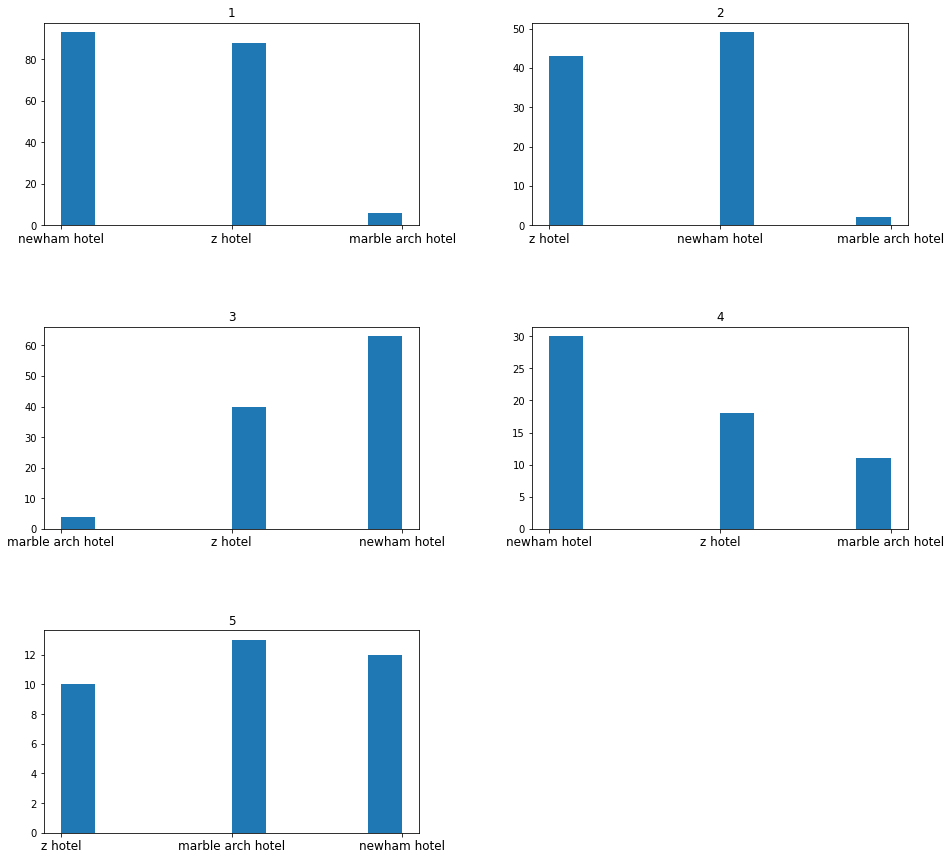

In [115]:
#data2.plot.hist(by='Review Rating', bins=15)
filtered_data.hist(column='Property Name', by='Review Rating', figsize=(15,15), xrot=0, xlabelsize=12)


In [55]:
grouped = data2.groupby('Property Name')
grouped.first()

,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review,Positive,Negative
Property Name,,,,,,,
45 park lane dorchester collection,5,best expierenced london,time met left first class expierence suite eve...,monaco,9/20/2012,2,-1
apex london wall hotel,5,ottima qualità prezzo,siamo stati londra per un week end ed abbiamo ...,casale monferrato italy,10/20/2012,3,-2
bulgari hotel london,5,anything dream,get anything want yes like alice restaurant lu...,milano,7/15/2012,3,-1
city view hotel,1,hilariously bad,good room size bathroom size london hotel frid...,leeds united kingdom,6/19/2017,2,-2
corinthia hotel london,5,far best hotel world,pleasure staying hotel 7 nights recently hotel...,savannah georgia,3/23/2016,3,-1
dorchester,4,great hotel needs game compete today,short stay mainly focussed around alain ducass...,cheshire,1/4/2017,2,-4
hartley hotel,3,hotel level fair rate,1 night honestly reception staff good helpful ...,carlisle united kingdom,2/25/2017,2,-1
hotel xenia autograph collection,5,ottimo,e stata la nostra prima volta questo albergo c...,athens greece,4/14/2014,2,-1
lanesborough,5,amazing service,amazing meal lanesborough hotel located edge h...,,1/26/2017,3,-1
